### [마법의 엘리베이터](https://school.programmers.co.kr/learn/courses/30/lessons/148653)

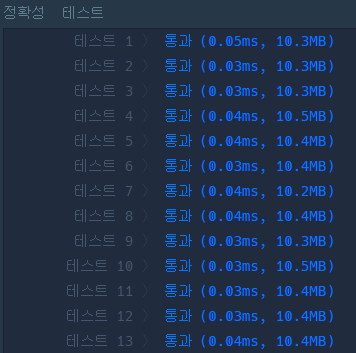

In [41]:
def solution(storey):
    answer = 0
    storey = str(storey)
    i = 0
    while True:
        i += 1
        N = len(storey)
        if i == N+1:
            break
        target = int(storey[-i])
        if target < 5 or i == N:
            answer += min(target, 11-target)
        elif target > 5:
            storey = str(int(storey[:-i]) + 1) + storey[-i:]
            answer += 10 - target
        elif target == 5:                
            for j in range(i+1, len(storey)+1):
                n_target = int(storey[-j])
                if n_target >= 5:
                    # print(f'{j=}, {storey=}')
                    storey = str(int(storey[:-i]) + 1) + storey[-i:]
                    break
                elif n_target < 5:
                    break
            answer += 5
        # print(f'{storey=}, {answer=}')
    return answer

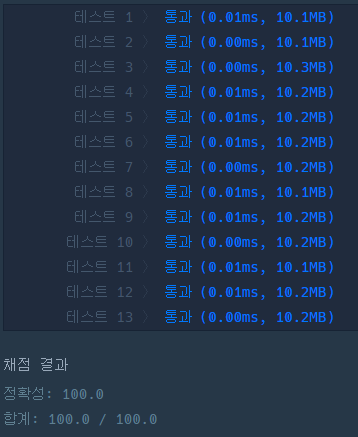

In [132]:
def solution(storey):
    answer = 0
    while storey > 0:
        storey, moves = divmod(storey, 10) # 뒤에서부터 카운트
        if moves > 5 or (moves == 5 and storey % 10 >= 5): # 숫자를 올리는게 최적인 경우
            moves = 10 - moves
            storey += 1
        answer += moves
    return answer

In [123]:
from collections import deque

def solution(storey):
    queue = deque([(storey, 1, 0)]) # (number, step, answer)
    high = 10 ** len(str(storey)) + 1
    history = [False] * high
    history[storey] = False
    while queue:
        num, step, answer = queue.popleft()
        
        if step == len(str(num)):
            
        target = int(str(num)[-step])
        
        # plus
        cnt = 10 - target
        new = num + cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("\nplus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))
                    
        # minus
        cnt = target
        new = num - cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("minus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))

    return history[1560]

In [124]:
solution(1555)


plus 1560
minus 1550

plus 1564
minus 1554

plus 1555
minus 1545

plus 1569
minus 1559
minus 1549
minus 1540

plus 1578
minus 1568
minus 1558
minus 1548
minus 1539


5

### [숫자 카드 나누기](https://school.programmers.co.kr/learn/courses/30/lessons/135807)

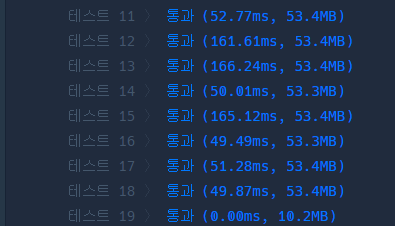

In [41]:
# 유클리드 호제법을 이용해 최대 공약수 구하기
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def solution(arrayA, arrayB):
    lenA, lenB = len(arrayA), len(arrayB)
    
    # arrayA의 최대공약수를 구하고, 이를 이용해 리스트 안의 값들을 나눌 수 있는 최대값 구하기
    gcdA = gcd(arrayA[0], arrayA[1]) if lenA > 1 else arrayA[0]
    gcdB = gcd(arrayB[0], arrayB[1]) if lenB > 1 else arrayB[0]

    max_gcd = max(gcdA, gcdB)
    if max_gcd > 1:
        
        sampleA, sampleB = arrayA[0], arrayB[0]
        for i in range(max_gcd, 1, -1):
            if sampleA % i == 0 or sampleB % i == 0:
                checkA = len([x%i for x in arrayA if x%i == 0])
                checkB = len([y%i for y in arrayB if y%i == 0])           

                if (checkA==lenA and not checkB) or (checkB==lenB and not checkA):
                    return i
                
    return 0

- reduce 함수를 이용해 한 번에 리스트 내 모든 함수들의 최대 공약수를 구해버리기

In [53]:
from functools import reduce

# 유클리드 호제법을 이용해 최대 공약수 구하기
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def solution(arrayA, arrayB):    
    gcdA, gcdB = reduce(gcd, arrayA), reduce(gcd, arrayB)
    
    answer = 0
    if all(x%gcdB for x in arrayA):
        answer = gcdB
    if all(y%gcdA for y in arrayB):
        answer = max(answer, gcdA)  
    
    return answer

- 유클리드 호제법을 이용한 최대공약수 함수도 math 모듈에서 불러오기

In [46]:
from functools import reduce
from math import gcd

def solution(nums1, nums2):
    gcd1, gcd2 = reduce(gcd, nums1), reduce(gcd, nums2)
    answer = 0
    if all(x % gcd2 for x in nums1):
        answer = gcd2
    if all(y % gcd1 for y in nums2):
        answer = gcd1 if gcd1 > answer else answer
    return answer

In [49]:
arrayA = [4, 8, 16]
reduce(gcd, arrayA)

4

In [54]:
arrayA = [5]
arrayB = [8]
solution(arrayA, arrayB)

8

In [52]:
arrayA = [9, 17]
arrayB = [10, 20]
solution(arrayA, arrayB)

0

In [18]:
def gcd(a, b):
    while b:
        print(f'\nbefore:{a=}, {b=}')
        a, b = b, a % b
        print(f'after:{a=}, {b=}')
    return a

# 예시 사용
num1 = 48
num2 = 18

result = gcd(num1, num2)
print(f"{num1}와 {num2}의 최대 공약수는 {result}입니다.")


before:a=48, b=18
after:a=18, b=12

before:a=18, b=12
after:a=12, b=6

before:a=12, b=6
after:a=6, b=0
48와 18의 최대 공약수는 6입니다.


In [20]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def find_all_divisors(n):
    divisors = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisors.append(i)
    return divisors

def common_divisors(num1, num2):
    gcd_value = gcd(num1, num2)
    return find_all_divisors(gcd_value)

# 예시 사용
num1 = 48
num2 = 18
divisors = common_divisors(num1, num2)

print(f"{num1}와 {num2}를 모두 나눌 수 있는 숫자들은 {divisors}입니다.")


48와 18를 모두 나눌 수 있는 숫자들은 [1, 2, 3, 6]입니다.


### [시소 짝꿍](https://school.programmers.co.kr/learn/courses/30/lessons/152996)

- 핵심은 제한사항 중 데이터의 범위를 잘 보는 것.  
  구체적으로 wieghts의 길이는 최대 100,000으로 아주 길 수 있지만, 그렇게 구현된 wieghts의 범위는 100~1000으로 901개밖에 되지 않으므로,  
  이를 고려해 가능한 경우의 수를 제한하고, 제한된 범위 안에서 작업함으로써 문제를 푸는 식으로 진행  

In [67]:
from collections import Counter

def solution(weights):
    counter = Counter(weights)
    answer = 0

    for c in counter:
        if counter[c] > 0:
            # 자기 자신과 동일 -> 같은 거리에 앉아야함
            answer += counter[c] * (counter[c] - 1) // 2 # nC2 n!/2!(n - 2)!
            # 두 명이 앉는 경우의 수 -> 다른 거리에 앉아야함
            answer += counter[c] * counter[c * 4 / 3] # 4m & 3m
            answer += counter[c] * counter[c * 4 / 2] # 4m & 2m
            answer += counter[c] * counter[c * 3 / 2] # 3m & 2m

    return answer

In [68]:
weights = [100,100,150, 150]
solution(weights)

6

In [66]:
weights = [100,180,360,100,270]
solution(weights)

w=270, answer=0
w=360, answer=1
w=180, answer=3
w=100, answer=6


8

In [27]:
weights = [100,180,360,100,270]
weights = ([[w*2, w*3, w*4] for w in weights])

flattened_list = [item for sublist in weights for item in sublist]

# 결과 출력
print(flattened_list)


[200, 300, 400, 360, 540, 720, 720, 1080, 1440, 200, 300, 400, 540, 810, 1080]
